In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

Examining the Data

In [2]:
df=pd.read_csv(r'C:\Users\SYS1\Downloads\baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Dataset contains all sum values will be zero

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
df.shape

(30, 17)

Dataset contains 30 rows and 17 columns

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here is the 17 columns detail

Summary Statistics

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


1. The mean is more than median 50% percentage in all columns
2. There is a large difference in 75% Percentage and max
3. The 1 & 2 Observation suggest that there are extreme outliers present in these three columns

In [9]:
df.ERA.unique()

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

Target/dependent variables is discrete and categorial in nature

In [10]:
df.ERA.value_counts()

3.62    1
4.31    1
3.57    1
3.74    1
3.94    1
4.02    1
5.04    1
3.67    1
4.24    1
4.69    1
4.41    1
4.16    1
3.43    1
4.14    1
4.03    1
3.21    1
4.28    1
3.36    1
4.04    1
3.80    1
3.72    1
3.44    1
4.07    1
4.64    1
2.94    1
3.73    1
4.09    1
4.33    1
4.05    1
3.98    1
Name: ERA, dtype: int64

Here Dataset ERA contains categorical values

<AxesSubplot:xlabel='W', ylabel='count'>

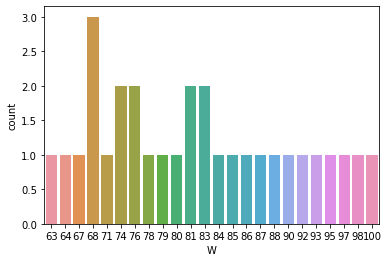

In [11]:
sns.countplot(df['W'])

Here we can see the data is not normally distributed in the columns

<AxesSubplot:xlabel='R', ylabel='count'>

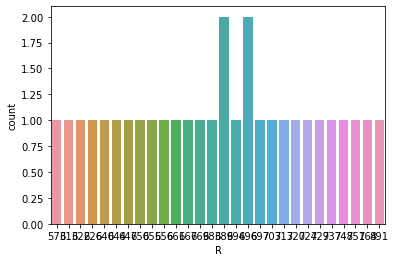

In [13]:
sns.countplot(df['R'])

Here also the data is not normally distributed in the columns

<AxesSubplot:xlabel='AB', ylabel='count'>

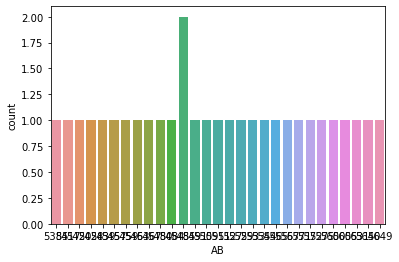

In [14]:
sns.countplot(df['AB'])

In [ ]:
Here Data is not normally distributed in the columns

<AxesSubplot:xlabel='H', ylabel='count'>

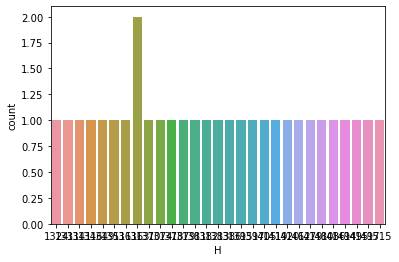

In [15]:
sns.countplot(df['H'])

Here Data is not normally distributed in the columns

<AxesSubplot:xlabel='2B', ylabel='count'>

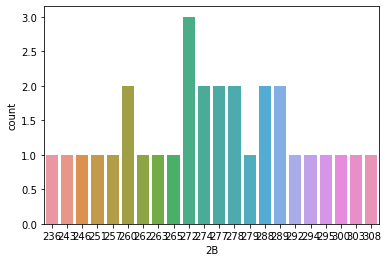

In [16]:
sns.countplot(df['2B'])

Here Data is not normally distributed in these columns

<AxesSubplot:xlabel='3B', ylabel='count'>

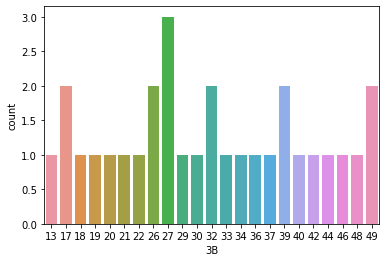

In [17]:
sns.countplot(df['3B'])

Here Data is not normally distributed in these columns

<AxesSubplot:xlabel='HR', ylabel='count'>

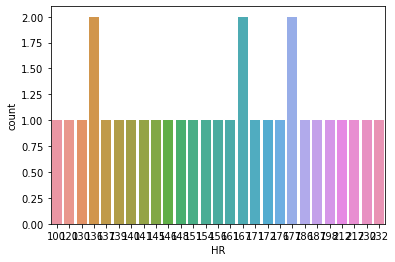

In [18]:
sns.countplot(df['HR'])

Here Data is not normally distributed in these columns

<AxesSubplot:xlabel='BB', ylabel='count'>

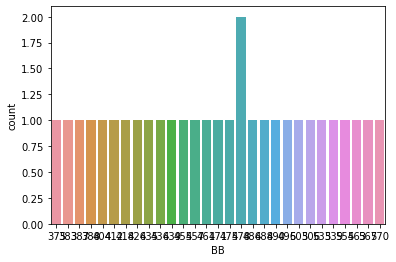

In [19]:
sns.countplot(df['BB'])

Here Data is not normally distributed in these columns

<AxesSubplot:xlabel='ERA', ylabel='count'>

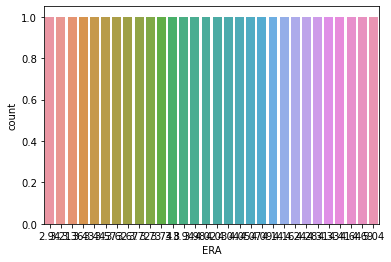

In [20]:
sns.countplot(df['ERA'])

Here Data is normally distributed in these columns

<AxesSubplot:>

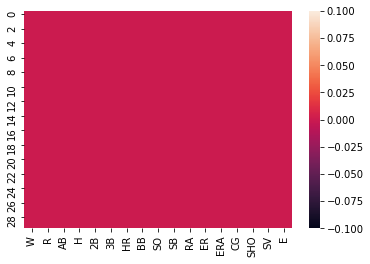

In [21]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [22]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

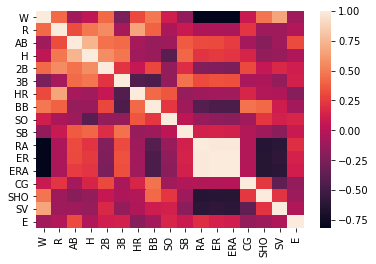

In [23]:
sns.heatmap(dfcor)

Here heatmap contains the difference of corresponding values of dataset
Light shades are highly correlated

<AxesSubplot:>

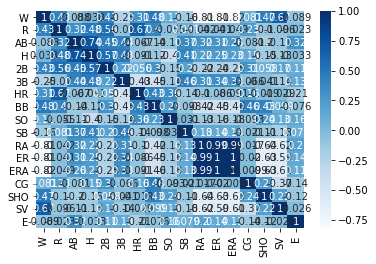

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark Shades are highly correlated

<AxesSubplot:>

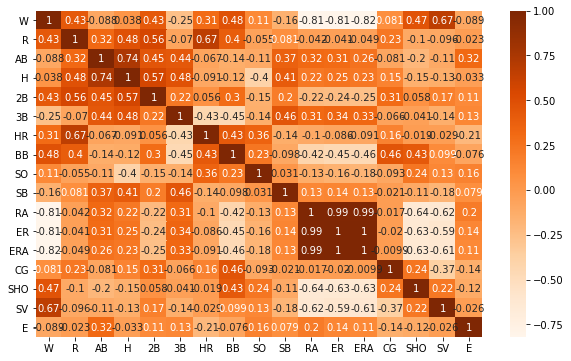

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are highly correlated

E is highly correlated with SV

SV is highly negatively correleated with ERA

ERA is hightly positively correlated with SO

SO is highly positively correlated with 3B

3B is highly positively correlated with 2B

AB is negatively correlated with E

In [29]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

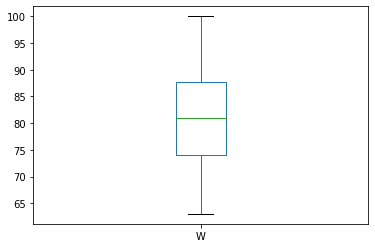

In [30]:
df['W'].plot.box()

Here W have no outside the viscous so we cant find here outliers easily

<AxesSubplot:>

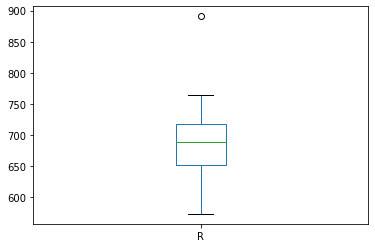

In [31]:
df['R'].plot.box()

Here R have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

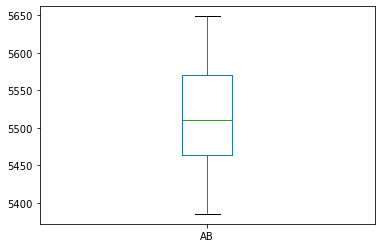

In [32]:
df['AB'].plot.box()

Here AB have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

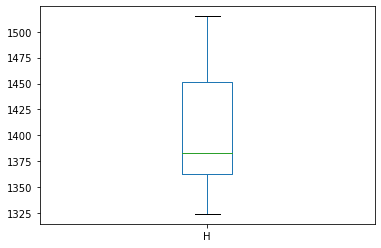

In [33]:
df['H'].plot.box()

Here H have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

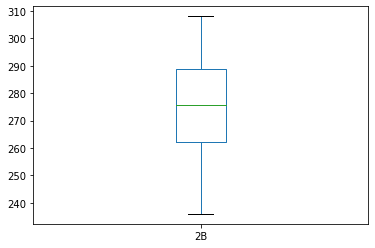

In [34]:
df['2B'].plot.box()

Here 2B have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

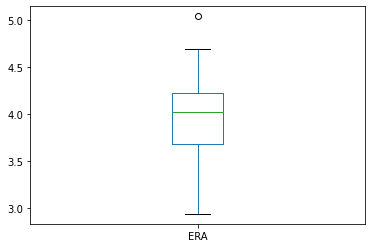

In [35]:
df['ERA'].plot.box()

Here ERA have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

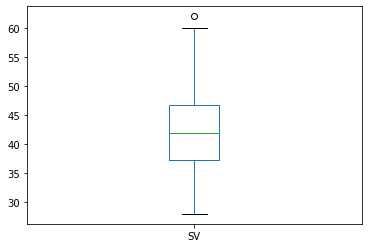

In [36]:
df['SV'].plot.box()

Here SV have outside the viscous so we can find here outliers easily.

In [40]:
df.shape

(30, 17)

Dataset contains 30 rows and 17 columns

In [41]:
collist=df.columns.values
ncols=17
nrows=10

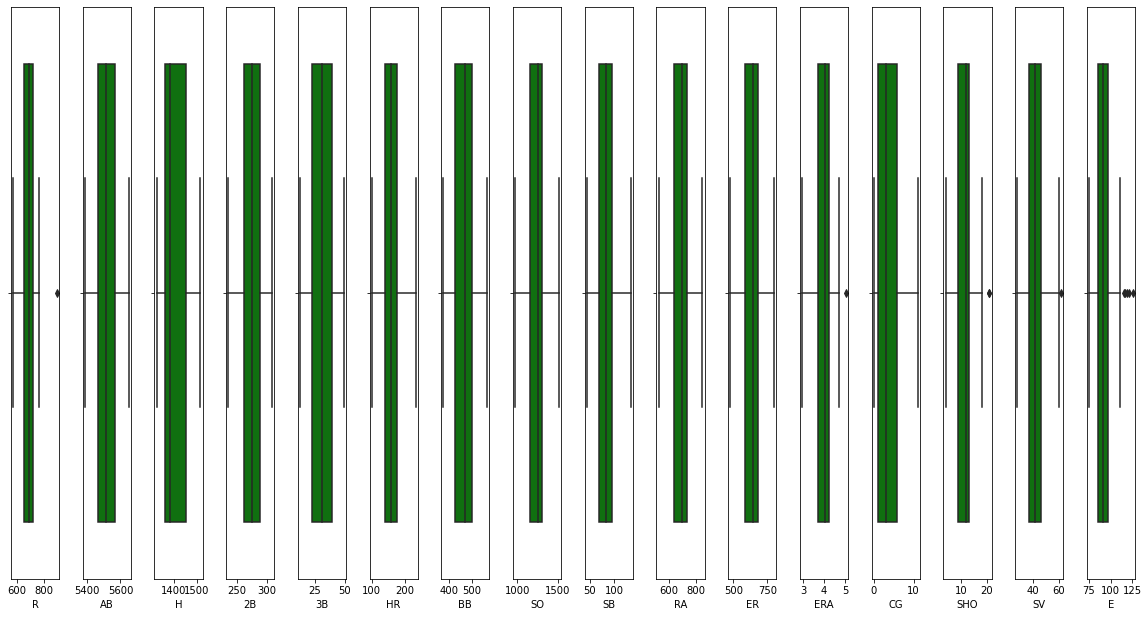

In [43]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Here we can find the collist of the all qualities and outliers.

To Check Distribution Skewness

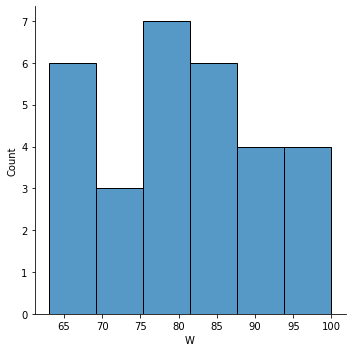

In [44]:
sns.displot(df['W'])

Data is not normally distributed in this columns.

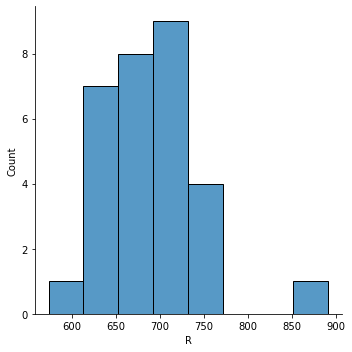

In [45]:
sns.displot(df['R'])

Data is not normally distributed in this columns.

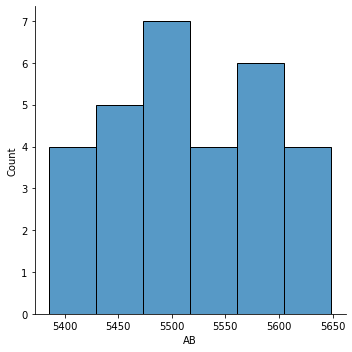

In [46]:
sns.displot(df['AB'])

Data is not normally distributed in this columns.

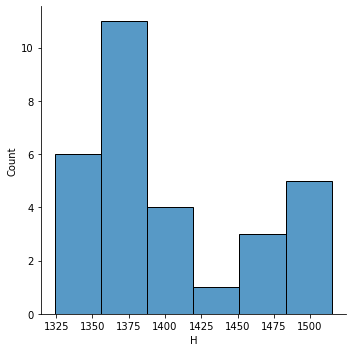

In [47]:
sns.displot(df['H'])

In [ ]:
Data is not normally distributed in this columns.

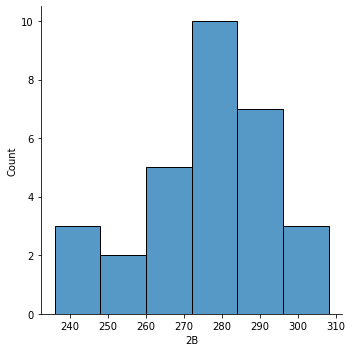

In [49]:
sns.displot(df['2B'])

In [ ]:
Data is not normally distributed in this columns.

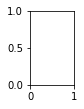

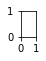

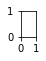

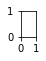

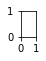

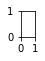

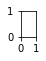

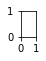

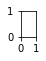

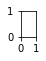

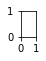

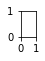

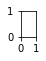

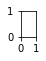

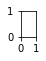

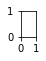

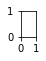

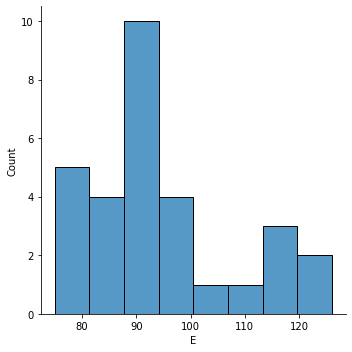

In [50]:
#plt.figure(figsize=(5*totalcol.5*totalcol))
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.displot(df[collist[i]])
    plt.tight_layout()

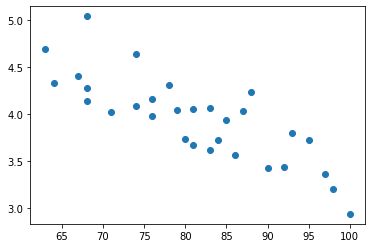

In [51]:
plt.scatter(df['W'],df['ERA'])

Here scatter the value of w and era

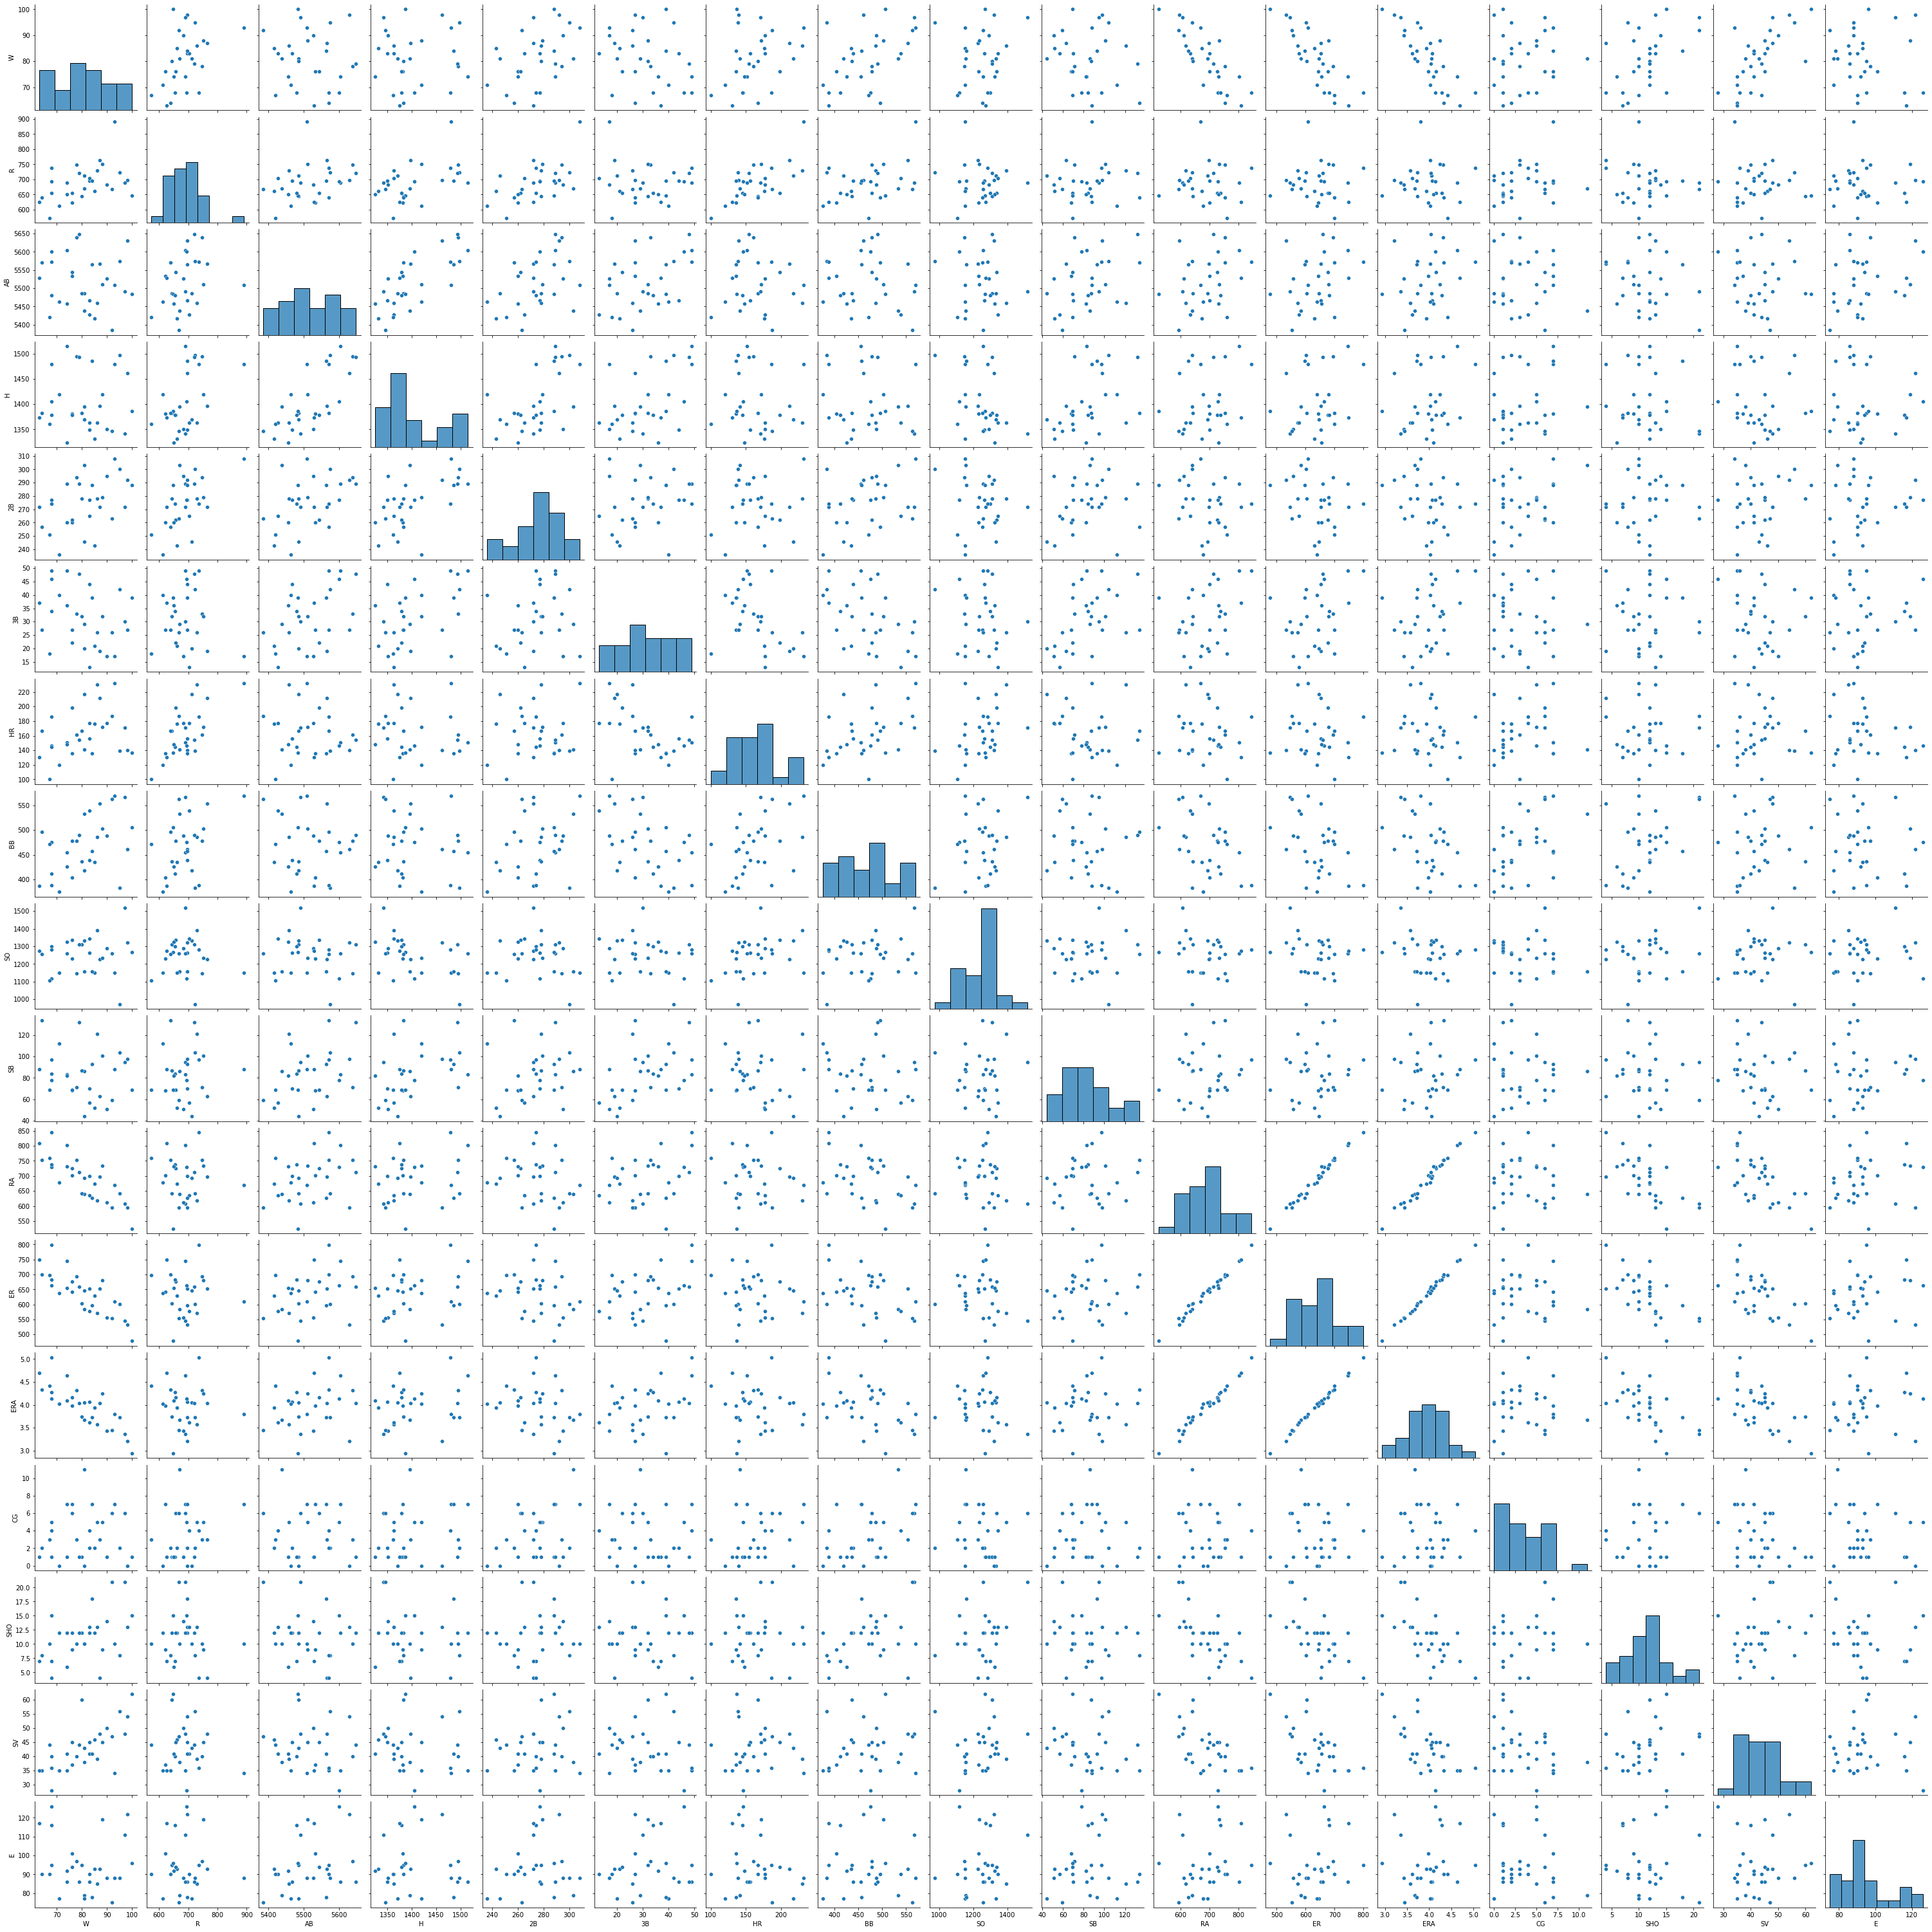

In [53]:
sns.pairplot(df)

Remove the missing values.

drop the negatively correlated columns.

remove the outliers.

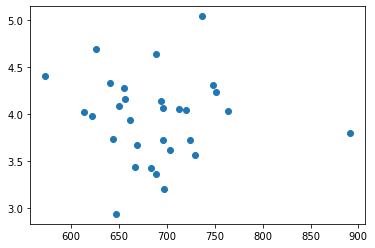

In [54]:
plt.scatter(df['R'],df['ERA'])
plt.show()

Here scattering plot of R and ERA

Encoding Method

In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['ERA']=LE.fit_transform(df["ERA"])

In [57]:
df['ERA'].unique()

array([ 9, 18,  7, 13, 27, 11, 15, 17, 10, 24, 22,  5, 12, 21, 20,  0,  1,
        2, 23, 25,  3,  6, 14, 26, 28,  4,  8, 16, 19, 29], dtype=int64)

In [58]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86


In [59]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Removing Outliers

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        6.35438416e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        4.04369901e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        8.66506930e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

Removing the outliers of dataset

In [66]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


thershold is 3 and print np where z>3

In [67]:
df_new=df[(z<3).all(axis=1)]

In [68]:
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,9,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,18,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,7,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,13,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,27,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,15,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,17,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,10,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,24,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,22,5,9,45,119


In [69]:
df.shape

(30, 17)

Dataset contains new shapes 30 rows and 17 columns

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [71]:
scaledX

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -6.35438416e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         4.04369901e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -8.66506930e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

In [72]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [73]:
Y.explained_variance_ratio_

array([3.17404703e-01, 1.82852010e-01, 1.28794707e-01, 8.54641930e-02,
       7.56834071e-02, 5.80425993e-02, 3.67277872e-02, 2.84104317e-02,
       2.66992264e-02, 1.97417369e-02, 1.57907949e-02, 9.33243117e-03,
       8.58544553e-03, 3.86824194e-03, 1.31660996e-03, 1.13369153e-03,
       1.51984322e-04])

In [74]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 31.74047026,  50.02567122,  62.90514192,  71.45156122,
        79.01990193,  84.82416186,  88.49694058,  91.33798374,
        94.00790638,  95.98208007,  97.56115956,  98.49440267,
        99.35294722,  99.73977142,  99.87143241,  99.98480157,
       100.        ])

In [75]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 12


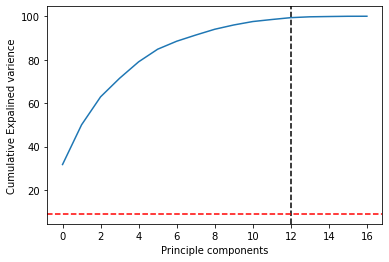

In [76]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

checking skewness

In [77]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.000000
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [80]:
x = df.drop(['ERA'],axis=1)
y = df["ERA"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [81]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

2.701851217221259
2.8106938645110393
2.898275349237888
2.5495097567963922
4.207136793592526
3.420526275297414
3.6606010435446255
2.345207879911715
3.5496478698597698
4.868264577855234
3.924283374069717
3.3466401061363023
4.03732584763727
2.3664319132398464
4.012480529547776
3.40587727318528
3.521363372331802
3.847076812334269
2.3874672772626644
3.3015148038438356
3.521363372331802
4.301162633521313
3.6193922141707713
3.82099463490856
2.1908902300206643
3.40587727318528
2.6267851073127395
2.4083189157584592
2.4289915602982237
3.286335345030997
2.3874672772626644
2.8635642126552705
2.8635642126552705
3.255764119219941
2.073644135332772
3.7416573867739413
4.0
5.882176467941097
4.711687595755898
3.255764119219941
2.7748873851023217
2.449489742783178
4.024922359499621
2.588435821108957
2.5099800796022267
2.756809750418044
3.605551275463989
2.6267851073127395
3.605551275463989
3.1780497164141406
2.6832815729997477
4.381780460041329
3.22490309931942
2.1447610589527217
3.794733192202055
3.1304

In [82]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
y_pred = regressor.predict(x_test)

In [84]:
y_pred

array([ 4., 17., 10., 26.,  5., 21., 26.,  7.,  5., 10.])

In [85]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegressor is 100

In [86]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
y_pred = regressor.predict(x_test)
y_pred

array([ 4.38, 13.13, 17.88, 24.31,  4.92, 21.64, 25.36,  7.76,  5.52,
       16.14])

In [88]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

98.88

The Test Accuracy of RandomForestRegressor is 98.74

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred = regressor.predict(x_test)
y_pred

array([-1.6604597 , 17.73022462,  9.7844042 , 19.21263131, -0.42196127,
       17.29660244, 21.39353512, -6.70779504,  8.31980657,  4.47017723])

In [91]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

98.71

The Test Accuracy of LogisticRegression is 97.87

In [92]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [93]:
y_pred = regressor.predict(x_test)
y_pred

array([ 5, 14, 27, 27,  3, 22, 21,  7,  3, 23], dtype=int64)

In [94]:
nb_accuracy = round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

100.0

The Test Accuracy of nb is 100

In [95]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [96]:
y_pred = regressor.predict(x_test)
y_pred

array([14.49307194, 14.4949514 , 14.50937373, 14.51019732, 14.47509952,
       14.50501333, 14.51276017, 14.49177525, 14.49112484, 14.50292097])

In [97]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

-1.01

In [ ]:
The Test Accuracy of SVR is -1.01

In [98]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [99]:
y_pred = regressor.predict(x_test)
y_pred

array([ 9. , 14. , 19.6, 21.2,  6. , 18.2, 21.4, 13. , 10.4, 16.4])

In [100]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

82.64

The Test Accuracy of KNN is 82.64

Cross value correction

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.8458787872485989


In [103]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9040921678883332


In [104]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

-0.16621995261490854


In [105]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7016330290430739


In [106]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6479309550877612


Hyperparameter Tunning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [109]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [111]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9}

Evaluate The Model

In [112]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

75.44642857142857


In [113]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here saving the model finalmodle.pkl

In [114]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[ 4. 17. 23. 26.  5. 23. 26.  7.  5. 10.]
[ 2 12 16 24  0 20 25  8  1 18]


The train and test data is balanced most classification methods hit the 80% accuracy with the datset.